In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter the features of the song:
Predicted Popularity: 62.47


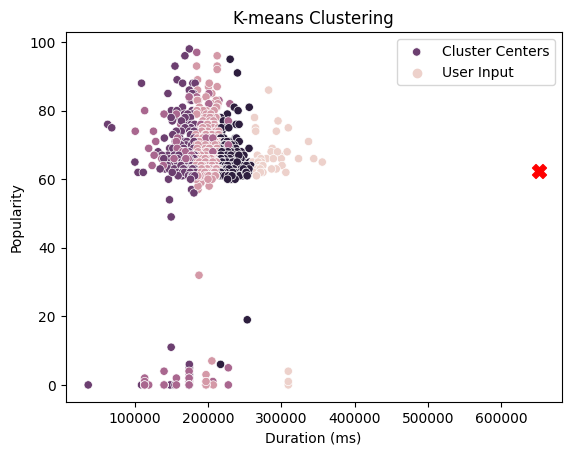

In [2]:

# Read the dataset
kpop_top1000_tracks = pd.read_csv("kpop_top1000_tracks.csv")

# Drop unnecessary columns (e.g., song_name, album_name, etc.)
kpop_top1000_tracks = kpop_top1000_tracks.drop(['song_name', 'album_name', 'album_link', 'artist_name', 'song_link'], axis=1)

# Convert categorical data to numerical using label encoding (explicit column)
label_encoder = LabelEncoder()
kpop_top1000_tracks['explicit'] = label_encoder.fit_transform(kpop_top1000_tracks['explicit'])

# Convert the 'release_date' column to a datetime object for further processing
kpop_top1000_tracks['release_date'] = pd.to_datetime(kpop_top1000_tracks['release_date'], errors='coerce')

# Extract the year, month, and day of the week from the 'release_date' column
kpop_top1000_tracks['release_year'] = kpop_top1000_tracks['release_date'].dt.year
kpop_top1000_tracks['release_month'] = kpop_top1000_tracks['release_date'].dt.month
kpop_top1000_tracks['release_dayofweek'] = kpop_top1000_tracks['release_date'].dt.dayofweek

# Drop the original 'release_date' column and any rows with invalid date values (NaT)
kpop_top1000_tracks = kpop_top1000_tracks.drop(['release_date'], axis=1).dropna()

# Standardize the numerical features for better model performance
scaler = StandardScaler()
X = scaler.fit_transform(kpop_top1000_tracks[['duration_ms', 'explicit']])

# Apply K-means clustering
num_clusters = 5  # Set the number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kpop_top1000_tracks['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (plotting two numerical features)
sns.scatterplot(x='duration_ms', y='popularity', hue='cluster', data=kpop_top1000_tracks)
plt.title('K-means Clustering')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

# Input features for a new song
print("Enter the features of the song:")
duration_ms_input = int(input("Duration (ms): "))
explicit_input = input("Explicit (True/False): ")
explicit_input = label_encoder.transform([explicit_input])[0]

# Preprocess the input
input_data = pd.DataFrame({
    'duration_ms': [duration_ms_input],
    'explicit': [explicit_input]
})

# Standardize the input data using the scaler fit on the original dataset
input_data_scaled = scaler.transform(input_data)

# Predict the cluster for the input data
predicted_cluster = kmeans.predict(input_data_scaled)[0]

# Get the average popularity of songs in the predicted cluster
predicted_popularity = kpop_top1000_tracks[kpop_top1000_tracks['cluster'] == predicted_cluster]['popularity'].mean()

print(f"Predicted Popularity: {predicted_popularity:.2f}")

# Highlight the user's input in the visualization
plt.scatter(duration_ms_input, predicted_popularity, color='red', marker='X', s=100)
plt.legend(['Cluster Centers', 'User Input'])
plt.show()

In [3]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, kpop_top1000_tracks['cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.545679480458211
